In [22]:
import pandas as pd
from datetime import datetime
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

df = pd.read_csv(r"DATA_TRAIN - Copy.csv")

In [23]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Stop 1,Stop 2,Stop 3,Stop 4,Dep_Time,Arrival_Details,Arrival_Date,Arrival_Time,No_of_Days,Duration_hour,Duration_minute,Total_Stops,Additional_Info,Price,Price_Bucket
0,IndiGo,24-03-2019,Banglore,New Delhi,BLR?DEL,NoSTOP,NoSTOP,NoSTOP,NoSTOP,22:20,22-03-2019 1:10,22-3-2019,1:10 AM,0,2,50,0,No info,3897,LOW
1,Air India,01-05-2019,Kolkata,Banglore,CCU?IXR?BBI?BLR,IXR,BBI,NoSTOP,NoSTOP,5:50,13:15,01-05-2019,1:15 PM,0,7,25,2,No info,7662,LOW
2,Jet Airways,09-06-2019,Delhi,Cochin,DEL?LKO?BOM?COK,LKO,BOM,NoSTOP,NoSTOP,9:25,10-06-2019 4:25,10-6-2019,4:25 AM,0,19,0,2,No info,13882,MEDIUM
3,IndiGo,12-05-2019,Kolkata,Banglore,CCU?NAG?BLR,NAG,NoSTOP,NoSTOP,NoSTOP,18:05,23:30,12-05-2019,11:30 PM,0,5,25,1,No info,6218,LOW
4,IndiGo,01-03-2019,Banglore,New Delhi,BLR?NAG?DEL,NAG,NoSTOP,NoSTOP,NoSTOP,16:50,21:35,01-03-2019,9:35 PM,0,4,45,1,No info,13302,MEDIUM


In [24]:
def prepareData(train):
    train["Date_of_Journey"] = pd.to_datetime(train["Date_of_Journey"],format="%d-%m-%Y")
    train["Arrival_Date"] = pd.to_datetime(train["Arrival_Date"],format="%d-%m-%Y")
    train["Dep_Time"] = train["Dep_Time"].apply(lambda x:datetime.strptime(x, '%H:%M').time())
    train["Arrival_Time"] = train["Arrival_Time"].apply(lambda x:datetime.strptime(x, '%H:%M %p').time())
    train["Dep_hour"] = train["Dep_Time"].apply(lambda x:x.hour)
    train["Day_of_week_of_Journey"] = train["Date_of_Journey"].apply(lambda x:x.weekday())
    train["Month_of_Journey"] = train["Date_of_Journey"].apply(lambda x:x.month)
    train["Day_of_Journey"] = train["Date_of_Journey"].apply(lambda x:x.day)
    train["Dep_Time_early_morning"]= train["Dep_Time"].apply(lambda x: x<datetime.strptime('6:00', '%H:%M').time())

    cat_col = ['Airline','Source', 'Destination','Stop 1', 'Stop 2', 'Stop 3', 'Stop 4','Additional_Info']
    date_time_col = ['Date_of_Journey','Arrival_Date', 'Arrival_Time', 'Dep_Time', 'Arrival_Details']
    col_to_drop = ['Route','Price_Bucket']

    train_cat_col = pd.get_dummies(train, drop_first=True, columns=cat_col)
    train_cat_col.drop(date_time_col,axis=1,inplace=True)
    try:
        train_cat_col.drop(col_to_drop,axis=1,inplace=True)
    except:
        pass
    return train_cat_col

In [25]:
train_cat_col = prepareData(df)

In [26]:
# Apply feature scaling.
price = train_cat_col.Price
train_cat_col_noPrice = train_cat_col.drop(["Price"],axis=1)

scale = StandardScaler()
df_scaled = scale.fit_transform(train_cat_col_noPrice)

df_scaled = pd.DataFrame(df_scaled,columns=train_cat_col_noPrice.columns)

# PCA

Text(0.5,1,'Explained Variance Per Principal Component')

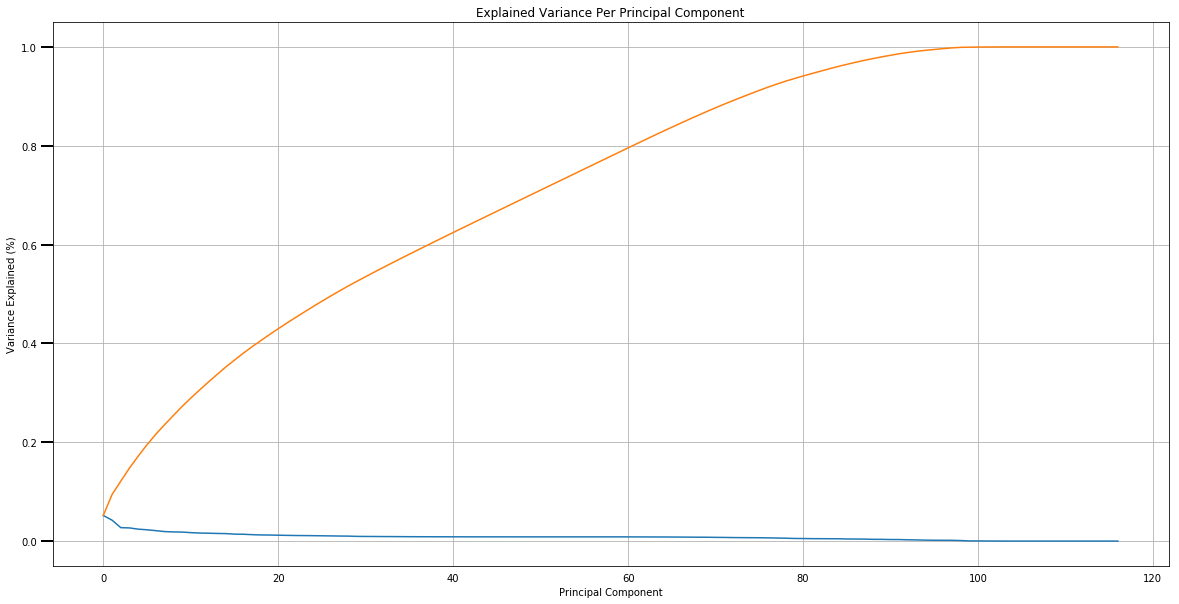

In [27]:
# Investigate the variance accounted for by each principal component.

pca = PCA()
df_pca = pca.fit_transform(df_scaled)

num_components=len(pca.explained_variance_ratio_)

ind = np.arange(num_components)
vals = pca.explained_variance_ratio_
 
plt.figure(figsize=(20, 10))
ax = plt.subplot(111)
cumvals = np.cumsum(vals)
ax.plot(ind, vals)
ax.plot(ind, cumvals)


ax.xaxis.set_tick_params(width=0,gridOn=True)
ax.yaxis.set_tick_params(width=2, length=12,gridOn=True)
 
ax.set_xlabel("Principal Component")
ax.set_ylabel("Variance Explained (%)")
plt.title('Explained Variance Per Principal Component')

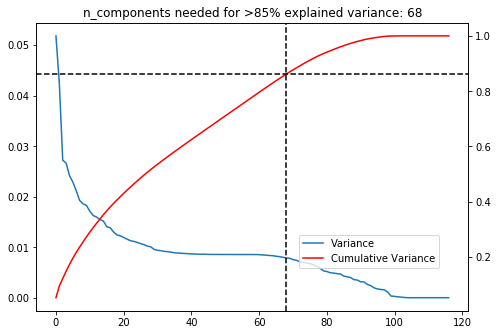

In [28]:
## Addition based on Requires Changes suggestion:

n_components = min(np.where(np.cumsum(pca.explained_variance_ratio_)>0.85)[0]+1)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1],True)
ax2 = ax.twinx()
ax.plot(pca.explained_variance_ratio_, label='Variance',)
ax2.plot(np.cumsum(pca.explained_variance_ratio_), label='Cumulative Variance',color = 'red');
ax.set_title('n_components needed for >85% explained variance: {}'.format(n_components));
ax.axvline(n_components, linestyle='dashed', color='black')
ax2.axhline(np.cumsum(pca.explained_variance_ratio_)[n_components], linestyle='dashed', color='black')
fig.legend(loc=(0.6,0.2));

In [8]:
# Re-apply PCA to the data while selecting for number of components to retain.

pca = PCA(n_components=69)
df_pca = pca.fit_transform(df_scaled)
print(pca.explained_variance_ratio_.sum())
df_pca = pd.DataFrame(df_pca)

0.8600981017991645


# Modeling

In [9]:
from sklearn.cross_validation import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_scaled, 
                                                    price, 
                                                    test_size = 0.01, 
                                                    random_state = 42)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 10575 samples.
Testing set has 107 samples.


C:\Users\Chandan\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# RandomForest 

In [34]:
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [35]:
modelRandom= RandomForestRegressor(random_state=0)#(n_estimators=10, max_depth=None,min_samples_split=2, random_state=0)
modelRandom=modelRandom.fit(X_train, y_train)
predicted= modelRandom.predict(X_test)
rmsRandom = sqrt(mean_squared_error(y_test, predicted))

# GBM

In [31]:
    params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
    clf = GradientBoostingRegressor(**params)

    clf.fit(X_train, y_train)
    predicted=clf.predict(X_test)

In [41]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8]
}

In [42]:
from sklearn.model_selection import GridSearchCV

CV_rfc = GridSearchCV(estimator=modelRandom, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [200, 500], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [4, 5, 6, 7, 8]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [43]:
predicted=CV_rfc.predict(X_test)

In [44]:
r2_score(list(y_test), predicted),rmsRandom

(0.9060598400092862, 1085.5671080614648)

# Test Data

In [45]:
test = pd.read_csv(r"DATA_TEST - Copy.csv")

In [46]:
test_cat_col = prepareData(test)

In [47]:
    def checkColumns(trainData,predictionData):
        dfActualCol = trainData.columns
        dfGiven = predictionData.copy()
        columns = [col for col in dfActualCol if col not in dfGiven.columns]
        for column in columns:
            dfGiven[column] = 0
            
        output = dfGiven[dfActualCol]
        return output
    
    test_cat_col_ = checkColumns(X_train,test_cat_col)

In [48]:
test_scaled = scale.transform(test_cat_col_)

In [49]:
model = CV_rfc

In [50]:
outputPredicted= model.predict(test_scaled)

In [51]:
output = pd.DataFrame(outputPredicted,columns=["Price"])
output["Price"] = output.Price.astype(int)

In [52]:
output.to_excel("output6.xlsx",index=False)

In [20]:
output

,Price
0,14714
1,4226
2,12898
3,12938
4,3586
5,10262
6,11178
7,4897
8,4638
9,14697
